In [1]:
# import data from 'SpikeData05.npz'
import numpy as np
data = np.load('SpikeData05.npz')
spikewaveforms = data['SpikeWaveforms']
data.close()

# 1. Plot the spike peaks in 4-D space (10 pts)

In [2]:
# picking spikes' voltages from data
peaks=[]
for i in range(len(spikewaveforms[:])):
    peaks1=[]
    for l in range(4):
        peaks1.append(max(spikewaveforms[i][:25,l]))
    peaks.append(peaks1)

In [3]:
# using pandas exhibit spikes of each tetrode
import pandas as pd
peaks=pd.DataFrame(peaks,columns=[1,2,3,4])
peaks

,1,2,3,4
0,43.805231,65.536775,27.432441,32.996149
1,56.615015,66.850535,22.189140,28.964973
2,44.127653,61.012985,38.714919,40.208983
3,36.440100,68.402104,21.431955,27.223397
4,64.262256,58.773941,28.057973,46.809110
5,48.243347,64.509677,18.974562,46.908031
6,278.341674,133.779265,85.949836,86.102406
7,258.810860,124.398346,81.044804,75.841202
8,79.176019,78.947086,42.272079,30.450592
9,74.360329,154.165039,46.032699,100.902048


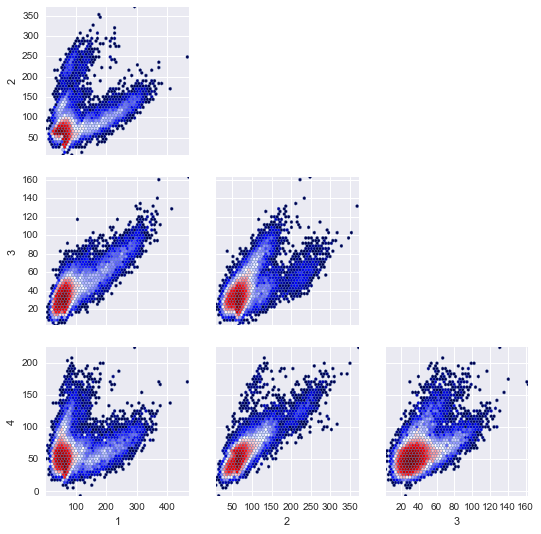

In [4]:
# Plot the spike peaks in 4-D space
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

PP = peaks
g = sns.PairGrid(PP)
g = g.map_lower(plt.hexbin,gridsize=50, mincnt=1, cmap='seismic',bins='log')
for i, j in zip(*np.triu_indices_from(g.axes, 0)):
    g.axes[i, j].set_visible(False)

# 2.Clustering with K-Means (40 pts)

## a.

In [5]:
# picking first 2000 snippets
snippets=[]
for i in range(2000):
    snippets.append(spikewaveforms[i][:,0])

In [25]:
snippets=np.array(snippets)
np.shape(snippets)

(2000, 40)

In [206]:
# randomly pick 3 snippets as the inital central point
import random
initial=random.sample(list(snippets),3)
initial

[array([ -8.8965941 ,  -8.11269173,  -6.91344246,   3.12338179,
         19.57680736,  28.99910181,  24.78726289,  17.49928929,
         23.16098603,  41.5450398 ,  52.33996243,  38.50014023,
          6.04264247, -25.86291218, -45.28878122, -52.10112836,
        -50.88565283, -45.31880856, -36.09953293, -22.10950188,
         -5.32865325,   7.51383992,  11.5868502 ,   9.49937528,
          7.6613831 ,   9.47716408,  13.82999064,  17.68239067,
         18.34825387,  15.4751882 ,  11.16893474,   5.94352912,
         -2.45260901, -12.43004395, -16.07031098,  -7.94086019,
          7.38540941,  19.98586687,  24.693706  ,  23.39431299]),
 array([ -1.40129627e+01,  -2.22124087e+01,  -1.74666400e+01,
         -1.46488061e+00,   1.56553327e+01,   2.15535476e+01,
          1.21088079e+01,  -1.27975868e+00,   3.06867199e-02,
          2.15169262e+01,   4.73753535e+01,   5.65036049e+01,
          4.51604968e+01,   3.29723103e+01,   4.39702359e+01,
          7.97722819e+01,   1.18649745e+02,   1.

In [207]:
# Desgin my own version of implementation of K-means
# as long as calculate each objective number J after each E or M steps.
def E_step(U):
    Rn1=np.zeros(2000)
    Rn2=np.zeros(2000)
    Rn3=np.zeros(2000)
    for i in range(2000):
        distance=[]
        for l in range(3):
            distance.append(sum((snippets[i]-U[l])**2))
        k=distance.index(min(distance))+1
        if k==1:
            Rn1[i]=1
        elif k==2 :
            Rn2[i]=1
        elif k==3 :
            Rn3[i]=1
        
    J_E1=sum(((snippets-U[0])**2).sum(axis=1)*Rn1)+sum(((snippets-U[1])**2).sum(axis=1)*Rn2)+sum(((snippets-U[2])**2).sum(axis=1)*Rn3)
    return Rn1,Rn2,Rn3,J_E1

def M_step(Rn1,Rn2,Rn3):
    u10=snippets[np.where(Rn1)]
    u1=np.average(u10,axis=0)
    u20=snippets[np.where(Rn2)]
    u2=np.average(u20,axis=0)
    u30=snippets[np.where(Rn3)]
    u3=np.average(u30,axis=0)
    U=np.array((u1,u2,u3))
    J_M1=sum(((snippets-u1)**2).sum(axis=1)*Rn1)+sum(((snippets-u2)**2).sum(axis=1)*Rn2)+sum(((snippets-u3)**2).sum(axis=1)*Rn3)
    return U,J_M1

In [222]:
# implement K-means algorithm for 20 times over the first 2000 snippets
Rn1,Rn2,Rn3,J_E1=E_step(initial)
J_E=[J_E1]
J_M=[]
for i in range(19):
    U,J_M1=M_step(Rn1,Rn2,Rn3)
    J_M.append(J_M1)
    Rn1,Rn2,Rn3,J_E1=E_step(U)
    J_E.append(J_E1)
    
U,J_M1=M_step(Rn1,Rn2,Rn3)
J_M.append(J_M1)

In [223]:
sum(Rn1)+sum(Rn2)+sum(Rn3)

2000.0

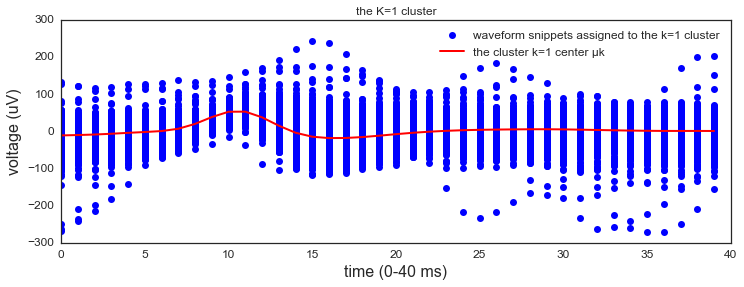

In [211]:
# For each cluster (k = 1, 2, 3), create a separate “voltage versus time” 
import matplotlib.pyplot as plt

% matplotlib inline

import seaborn as sns # seaborn styles things nicely
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 
            'xtick.labelsize': 12 })
sns.set_style('white')

snippets1=snippets[np.where(Rn1)]
times=np.arange(40)
for i in range(len(snippets1)-1):
    plt.plot(times,snippets1[i],'bo')
plt.plot(times,snippets1[-1],'bo',label='waveform snippets assigned to the k=1 cluster')
plt.plot(times,U[0],'r', label='the cluster k=1 center μk')
plt.title('the K=1 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

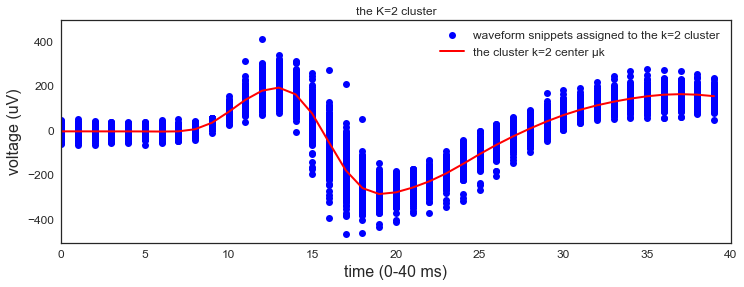

In [212]:
snippets2=snippets[np.where(Rn2)]
times=np.arange(40)
for i in range(len(snippets2)-1):
    plt.plot(times,snippets2[i],'bo')
plt.plot(times,snippets2[-1],'bo', label='waveform snippets assigned to the k=2 cluster')
plt.plot(times,U[1],'r', label='the cluster k=2 center μk')
plt.title('the K=2 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

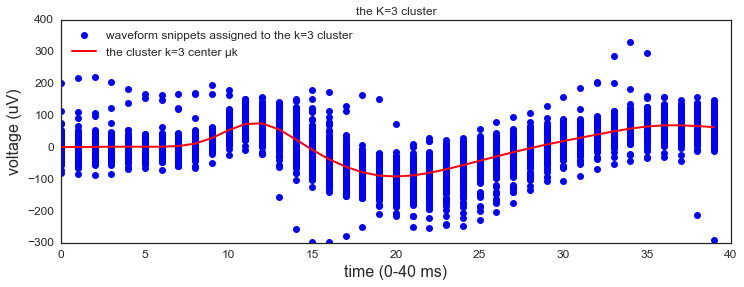

In [213]:
snippets3=snippets[np.where(Rn3)]
times=np.arange(40)
for i in range(len(snippets3)-1):
    plt.plot(times,snippets3[i],'bo')
plt.plot(times,snippets3[-1],'bo', label='waveform snippets assigned to the k=3 cluster')
plt.plot(times,U[2],'r', label='the cluster k=3 center μk')
plt.title('the K=3 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

## b.

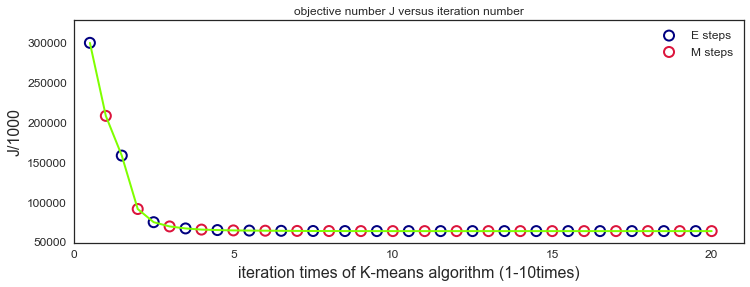

In [225]:
# Plot the objective number JJ versus iteration number
times=np.arange(20)
plt.scatter(times+0.5,np.array(J_E)/1000,s=100,linewidths=2,facecolors='none', edgecolors='navy',label='E steps')
plt.scatter(times+1,np.array(J_M)/1000,s=100,linewidths=2,facecolors='none', edgecolors='crimson', label='M steps')
plt.ylim([50000,330000])
plt.xlim([0,21])
times2=np.append(times+0.5,times+1)
times2.sort()
J=[]
for i in range(20):
    J.append(J_E[i])
    J.append(J_M[i])

plt.plot(times2,np.array(J)/1000,color='chartreuse')
legend=plt.legend(loc='best')

plt.title('objective number J versus iteration number')
plt.xlabel('iteration times of K-means algorithm (1-10times)')
plt.ylabel('J/1000')

In [226]:
# calculate how many iterations did it take for K-Means to converge
converge=[e==m for e,m in zip(J_E,J_M)]
times_converge=converge.index(max(converge))
print('it takes %d iterations for K-Means to converge'%(times_converge+1))
print('when converged, objective number J= %.2f' %(J_E[times_converge]))

it takes 13 iterations for K-Means to converge
when converged, objective number J= 64574558.73


## c.

In [100]:
# repeat the whole K-means algorithm for K=4
import random
initial2=random.sample(list(snippets),4)
initial2

[array([-34.19088592, -30.91239187, -15.27173421,   3.18031592,
         13.72897572,  15.35018017,  14.0778174 ,  16.75126908,
         26.8595622 ,  43.60358001,  61.60325493,  71.59496436,
         67.61593597,  55.87952402,  47.61365622,  43.45221213,
         37.90038042,  32.0128526 ,  29.25116809,  28.880172  ,
         28.41795278,  25.71183247,  20.36135053,  15.95204243,
         17.45308183,  24.26159789,  29.11594523,  27.36282579,
         21.30679947,  12.29202904,  -0.63470156, -13.04474136,
        -18.49214706, -18.05898573, -17.34608848, -18.51677561,
        -19.64484209, -18.23193474, -15.57929795, -16.28354814]),
 array([-19.58673613, -24.44557243, -27.86749496, -28.14047602,
        -25.76510819, -21.96677031, -14.76102871,   0.62707769,
         26.53596803,  53.57811996,  62.48211977,  45.58849831,
         17.82237918,  -2.79545509, -15.1385035 , -27.09817128,
        -37.86081271, -38.96591109, -27.70670098, -11.67920529,
         -1.8362542 ,  -2.01037472,  -

In [104]:
def E_step(U):
    Rn1=np.zeros(2000)
    Rn2=np.zeros(2000)
    Rn3=np.zeros(2000)
    Rn4=np.zeros(2000)
    for i in range(2000):
        distance=[]
        for l in range(4):
            distance.append(sum((snippets[i]-U[l])**2))
        k=distance.index(min(distance))+1
        if k==1:
            Rn1[i]=1
        elif k==2 :
            Rn2[i]=1
        elif k==3:
            Rn3[i]=1
        elif k==4:
            Rn4[i]=1
        
    J_E1=sum(((snippets-U[0])**2).sum(axis=1)*Rn1)+sum(((snippets-U[1])**2).sum(axis=1)*Rn2)\
        +sum(((snippets-U[2])**2).sum(axis=1)*Rn3)+sum(((snippets-U[3])**2).sum(axis=1)*Rn4)
        
    return Rn1,Rn2,Rn3,Rn4,J_E1

def M_step(Rn1,Rn2,Rn3,Rn4):
    u10=snippets[np.where(Rn1)]
    u1=np.average(u10,axis=0)
    u20=snippets[np.where(Rn2)]
    u2=np.average(u20,axis=0)
    u30=snippets[np.where(Rn3)]
    u3=np.average(u30,axis=0)
    u40=snippets[np.where(Rn4)]
    u4=np.average(u40,axis=0)
    U=np.array((u1,u2,u3,u4))
    J_M1=sum(((snippets-U[0])**2).sum(axis=1)*Rn1)+sum(((snippets-U[1])**2).sum(axis=1)*Rn2)\
        +sum(((snippets-U[2])**2).sum(axis=1)*Rn3)+sum(((snippets-U[3])**2).sum(axis=1)*Rn4)
        
    return U,J_M1

In [123]:
Rn1,Rn2,Rn3,Rn4,J_E1=E_step(initial2)
J_E=[J_E1]
J_M=[]
for i in range(29):
    U,J_M1=M_step(Rn1,Rn2,Rn3,Rn4)
    J_M.append(J_M1)
    Rn1,Rn2,Rn3,Rn4,J_E1=E_step(U)
    J_E.append(J_E1)
    
U,J_M1=M_step(Rn1,Rn2,Rn3,Rn4)
J_M.append(J_M1)

In [125]:
sum(Rn1)+sum(Rn2)+sum(Rn3)+sum(Rn4)

2000.0

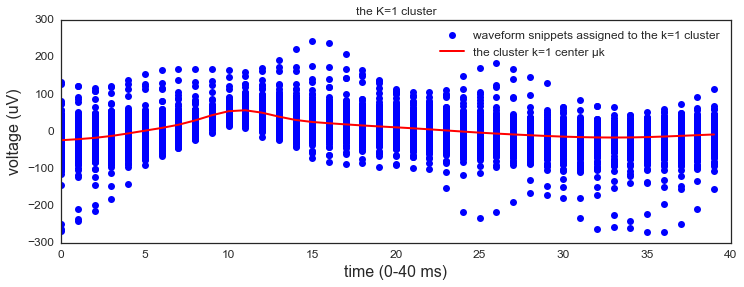

In [126]:
snippets1=snippets[np.where(Rn1)]
times=np.arange(40)
for i in range(len(snippets1)-1):
    plt.plot(times,snippets1[i],'bo')
plt.plot(times,snippets1[-1],'bo',label='waveform snippets assigned to the k=1 cluster')
plt.plot(times,U[0],'r', label='the cluster k=1 center μk')
plt.title('the K=1 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

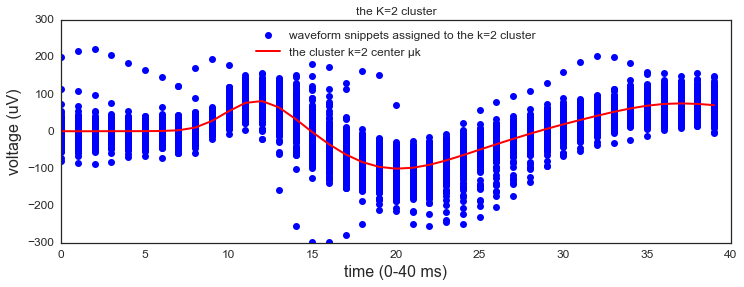

In [127]:
snippets2=snippets[np.where(Rn2)]
times=np.arange(40)
for i in range(len(snippets2)-1):
    plt.plot(times,snippets2[i],'bo')
plt.plot(times,snippets2[-1],'bo',label='waveform snippets assigned to the k=2 cluster')
plt.plot(times,U[1],'r', label='the cluster k=2 center μk')
plt.title('the K=2 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

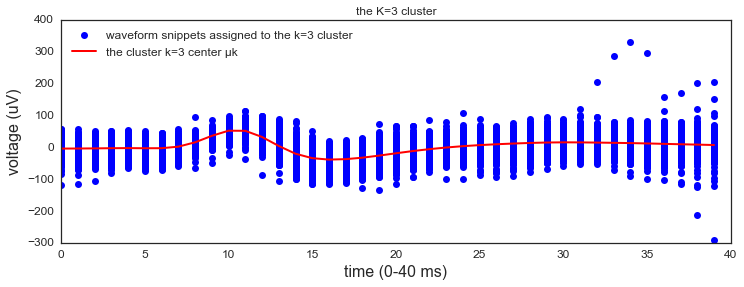

In [128]:
snippets3=snippets[np.where(Rn3)]
times=np.arange(40)
for i in range(len(snippets3)-1):
    plt.plot(times,snippets3[i],'bo')
plt.plot(times,snippets3[-1],'bo',label='waveform snippets assigned to the k=3 cluster')
plt.plot(times,U[2],'r', label='the cluster k=3 center μk')
plt.title('the K=3 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

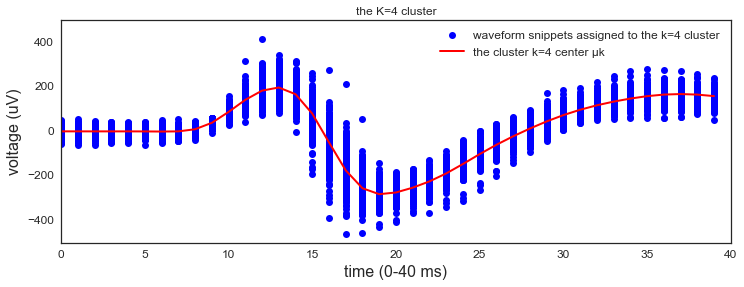

In [129]:
snippets4=snippets[np.where(Rn4)]
times=np.arange(40)
for i in range(len(snippets4)-1):
    plt.plot(times,snippets4[i],'bo')
plt.plot(times,snippets4[-1],'bo',label='waveform snippets assigned to the k=4 cluster')
plt.plot(times,U[3],'r', label='the cluster k=4 center μk')
plt.title('the K=4 cluster')
plt.xlabel('time (0-40 ms)')
plt.ylabel('voltage (uV)')
legend=plt.legend(loc='best')

In [131]:
J_E

[190550242.27938533,
 101068938.28386045,
 72346003.314774811,
 67085556.562325947,
 65908760.519495443,
 65647918.606274784,
 65518330.212077521,
 65383923.058762811,
 65135471.140090048,
 64541348.683333293,
 62974385.141690105,
 60079090.935730353,
 57413029.966499135,
 56176661.512442604,
 55514807.36948137,
 55279641.695526585,
 55162822.923185453,
 55111463.131130762,
 55095710.485471807,
 55086735.071381345,
 55076744.085466735,
 55076135.415425107,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052,
 55075962.202119052]

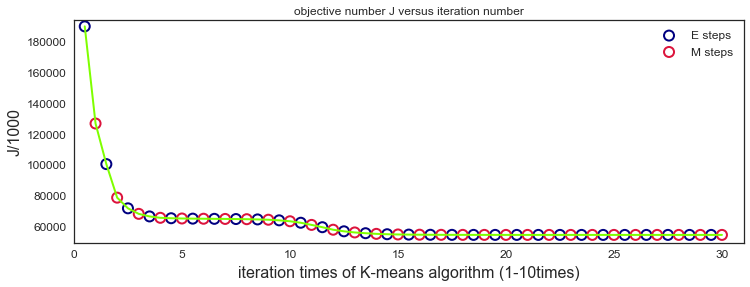

In [133]:
times=np.arange(30)
plt.scatter(times+0.5,np.array(J_E)/1000,s=100,linewidths=2,facecolors='none', edgecolors='navy',label='E steps')
plt.scatter(times+1,np.array(J_M)/1000,s=100,linewidths=2,facecolors='none', edgecolors='crimson', label='M steps')
plt.ylim([50000,195000])
plt.xlim([0,31])
times2=np.append(times+0.5,times+1)
times2.sort()
J=[]
for i in range(30):
    J.append(J_E[i])
    J.append(J_M[i])

plt.plot(times2,np.array(J)/1000,color='chartreuse')
legend=plt.legend(loc='best')

plt.title('objective number J versus iteration number')
plt.xlabel('iteration times of K-means algorithm (1-10times)')
plt.ylabel('J/1000')

In [134]:
converge=[e==m for e,m in zip(J_E,J_M)]
times_converge=converge.index(max(converge))
print('it takes %d iterations for K-Means to converge'%(times_converge+1))
print('when converged, objective number J= %.2f' %(J_E[times_converge]))

it takes 23 iterations for K-Means to converge
when converged, objective number J= 55075962.20


# 3.Using Gaussian Mixtures (50 pts)

## a.

In [135]:
# # import data from 'SpikeData12.npz'
data2 = np.load('SpikeData12.npz')
spikewaveforms2 = data2['SpikeWaveforms']
data2.close()

In [138]:
np.shape(spikewaveforms2)

(16789, 40, 4)

In [142]:
# # picking spikes' voltages from new data
peaks2=[]
for i in range(len(spikewaveforms2[:])):
    peaks1=[]
    for l in range(4):
        peaks1.append(max(spikewaveforms2[i][:25,l]))
    peaks2.append(peaks1)

In [324]:
from sklearn import mixture
# Using the first 5000 snippet-peaks, and learn the Gaussian mixture parameters for K=10K=10 neurons
train_peaks=peaks2[:5000]
gmix = mixture.GMM(n_components=10, covariance_type='full')
gmix.fit(train_peaks)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [325]:
# Using the parameters from the traning data to predict the distribution of training peaks itself.
target=gmix.predict(train_peaks)

In [326]:
p2=pd.DataFrame(train_peaks,columns=[1,2,3,4])
p2['target']=target+1
p2

,1,2,3,4,target
0,35.349022,39.436247,60.127339,46.966750,10
1,51.070169,61.763404,55.374978,67.079896,9
2,26.185653,20.145255,61.973838,27.694054,10
3,67.582243,48.922969,34.886350,34.782217,4
4,41.938871,52.912304,45.419840,63.533831,9
5,63.145690,33.223767,35.582849,27.720076,4
6,29.654466,45.566364,38.776232,69.688377,2
7,65.402797,44.637049,68.621814,59.613960,8
8,55.680496,62.977465,41.749812,45.549144,9
9,96.643899,155.548570,76.699842,177.082277,7


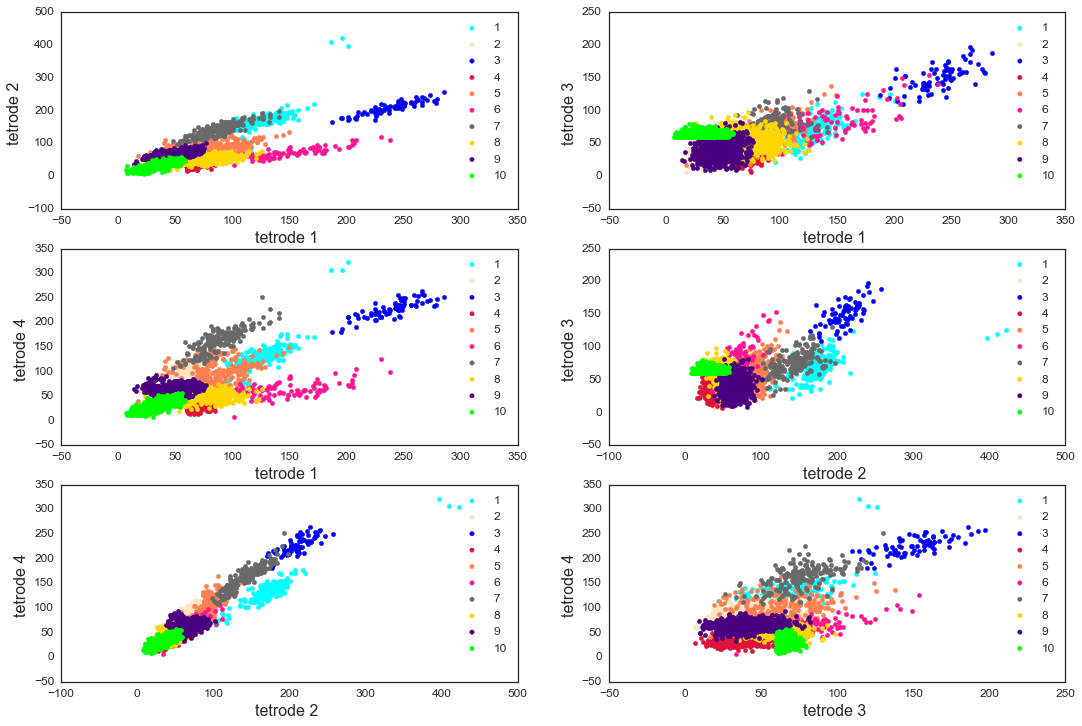

In [327]:
# Plot the resulting cluster assignments in a six panel with the clusters color-coded. 

colors=['aqua','bisque','blue','crimson','coral','deeppink','dimgray','gold','indigo','lime']
plt.figure(figsize=(18,12))
plt.subplot(321)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][1]),list(p2[p2.target==(i+1)][2]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 2 ')

plt.subplot(322)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][1]),list(p2[p2.target==(i+1)][3]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 3 ')

plt.subplot(323)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][1]),list(p2[p2.target==(i+1)][4]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 4 ')

plt.subplot(324)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][2]),list(p2[p2.target==(i+1)][3]), color=color, label=(i+1))

plt.xlabel('tetrode 2 ')
plt.ylabel('tetrode 3 ')
legend=plt.legend(loc='best')
plt.subplot(325)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][2]),list(p2[p2.target==(i+1)][4]), color=color, label=(i+1))

plt.xlabel('tetrode 2 ')
plt.ylabel('tetrode 4 ')
legend=plt.legend(loc='best')
plt.subplot(326)
for i,color in enumerate(colors):
    plt.scatter(list(p2[p2.target==(i+1)][3]),list(p2[p2.target==(i+1)][4]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 3 ')
plt.ylabel('tetrode 4 ')

## b.

In [364]:
# Picking next 5000 snippet-peaks as testing data
test_peaks=peaks2[5000:10000]
sum(gmix.score(test_peaks))

-84318.74241052306

In [369]:
# Separately calculate model likelihood of testing data using the parameters from training data
# with K=8,9,…,20
k=np.arange(8,21)
likelihood=[]
for K in k:
    gmix_K = mixture.GMM(n_components=K, covariance_type='full')
    gmix_K.fit(train_peaks)
    likelihood1=sum(gmix_K.score(test_peaks))
    likelihood.append(likelihood1)

In [370]:
likelihood

[-84471.755644598714,
 -84394.016828846143,
 -84318.845516150992,
 -84234.913947968787,
 -84181.060912371817,
 -85527.334291919906,
 -85513.05092821065,
 -85389.351069017852,
 -85617.046993813608,
 -85185.902658661013,
 -85575.968042979643,
 -85013.630365843201,
 -85102.164644989287]

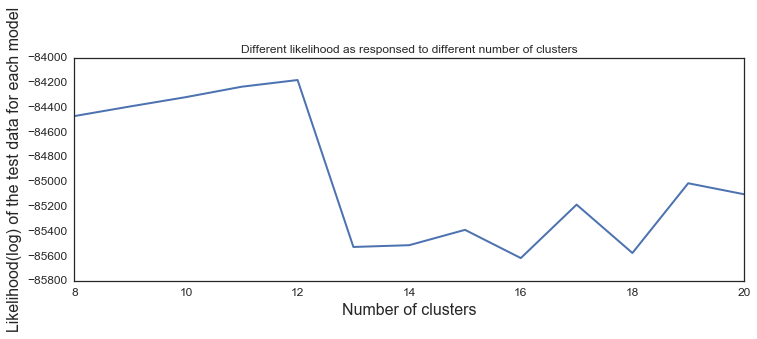

In [372]:
plt.plot(k,likelihood)
plt.title('Different likelihood as responsed to different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Likelihood(log) of the test data for each model')

### Acoording to the diagram, when the model has 12 clusters, it has the largest likelihood, so I'll chose K=12 as the model I will use for analysis.

In [373]:
gmix_12 = mixture.GMM(n_components=12, covariance_type='full')
gmix_12.fit(train_peaks)
target_12=gmix_12.predict(test_peaks)
p12=pd.DataFrame(test_peaks,columns=[1,2,3,4])
p12['target']=target_12+1
p12

,1,2,3,4,target
0,99.759517,165.707652,101.227002,191.249021,9
1,100.804627,161.033224,82.202495,188.848226,9
2,82.186444,141.439045,67.530186,162.279481,9
3,104.960335,161.636463,87.975189,179.398390,9
4,72.358011,137.316706,54.359433,145.988871,9
5,68.877445,125.601648,62.821333,161.542850,9
6,70.492910,75.788309,40.803970,60.566237,3
7,18.123071,14.364844,66.999955,18.400159,7
8,113.658088,76.674685,53.376316,66.665203,1
9,37.114240,38.174995,62.042578,26.695749,7


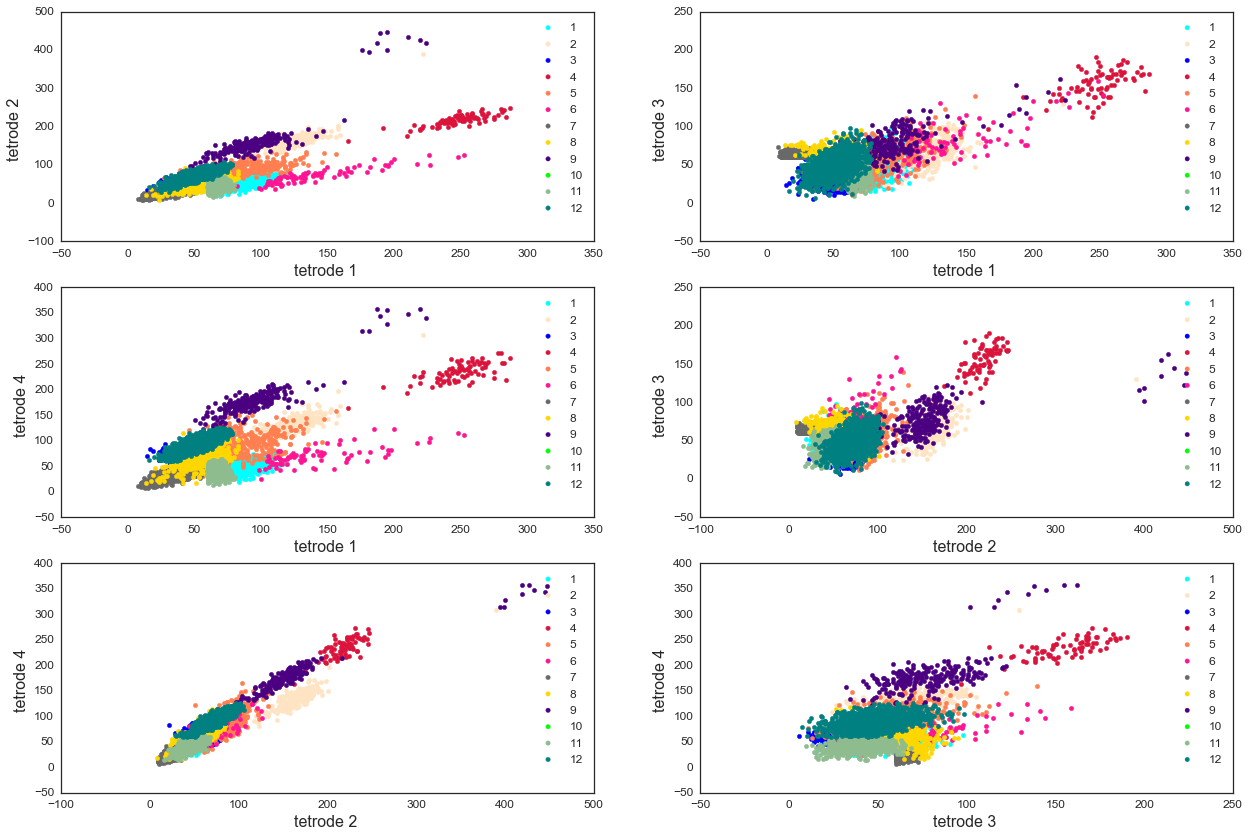

In [376]:
colors=['aqua','bisque','blue','crimson','coral','deeppink','dimgray','gold','indigo','lime','darkseagreen','teal']
plt.figure(figsize=(21,14))
plt.subplot(321)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][1]),list(p12[p12.target==(i+1)][2]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 2 ')

plt.subplot(322)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][1]),list(p12[p12.target==(i+1)][3]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 3 ')

plt.subplot(323)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][1]),list(p12[p12.target==(i+1)][4]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 1 ')
plt.ylabel('tetrode 4 ')

plt.subplot(324)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][2]),list(p12[p12.target==(i+1)][3]), color=color, label=(i+1))

plt.xlabel('tetrode 2 ')
plt.ylabel('tetrode 3 ')
legend=plt.legend(loc='best')
plt.subplot(325)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][2]),list(p12[p12.target==(i+1)][4]), color=color, label=(i+1))

plt.xlabel('tetrode 2 ')
plt.ylabel('tetrode 4 ')
legend=plt.legend(loc='best')
plt.subplot(326)
for i,color in enumerate(colors):
    plt.scatter(list(p12[p12.target==(i+1)][3]),list(p12[p12.target==(i+1)][4]), color=color, label=(i+1))
legend=plt.legend(loc='best')
plt.xlabel('tetrode 3 ')
plt.ylabel('tetrode 4 ')